In [ ]:
from google.colab import files
import pandas as pd

# Upload CSV file
uploaded = files.upload()

# Load the first uploaded CSV file
import io
for filename in uploaded:
    df = pd.read_csv(io.BytesIO(uploaded[filename]))
    print(f"{filename} loaded successfully!")

# Display a few rows
df.head()

Saving genz_comments.csv to genz_comments.csv
genz_comments.csv loaded successfully!


,comment_id,post_id,comment_body,created_utc,score
0,mrcb0a3,1kcz13l,Did you know we have a Discord server‽ You can...,2025-05-09 00:37:34,1
1,mq6varf,1kcz13l,Finally. Now we can talk about the REAL issues...,2025-05-02 13:08:44,121
2,mq6jjij,1kcz13l,THANK YOU,2025-05-02 11:54:37,1362
3,mq6l1d8,1kcz13l,https://preview.redd.it/bkrzeq2xzcye1.jpeg?wid...,2025-05-02 12:04:47,394
4,mq8q3ji,1kcz13l,"Gender War over, Class War begin.",2025-05-02 18:33:13,19


In [ ]:
import pandas as pd
import re
from google.colab import files
import io

# Upload file
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Read CSV
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Count original rows
original_len = len(df)

# Define pattern to match URLs or Discord links
url_pattern = r'(http[s]?://\S+|www\.\S+|discord\.gg/\S+|discord\.com/invite/\S+)'

# Apply filter
filtered_df = df[
    (df['comment_body'].str.split().str.len() >= 5) &
    (~df['comment_body'].str.contains(url_pattern, regex=True))
]

# Count filtered rows
filtered_len = len(filtered_df)
removed = original_len - filtered_len

# Print stats
print(f"Original rows: {original_len}")
print(f"Filtered rows: {filtered_len}")
print(f"Rows removed: {removed}")

# Save filtered file
filtered_df.to_csv("genz_comments_filtered.csv", index=False)
print("Filtered file saved as 'genz_comments_filtered.csv'")


Saving genz_comments.csv to genz_comments (1).csv
Original rows: 3070
Filtered rows: 2045
Rows removed: 1025
Filtered file saved as 'genz_comments_filtered.csv'


/tmp/ipython-input-2-2863471183.py:22: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  (~df['comment_body'].str.contains(url_pattern, regex=True))


In [ ]:
!pip install praw

import praw
import csv
import re

# Initialize Reddit API
reddit = praw.Reddit(
    client_id="sIST-1mg-y-93Je9eMSfwQ",          # Replace with your client_id
    client_secret="NHnNWdjItC0INk7UAyw0WVHvsBwEgw",      # Replace with your client_secret
    user_agent="EmotionScraper"
)

# Filter settings
MIN_POST_COMMENTS = 30
MIN_COMMENT_SCORE = 5
MIN_COMMENT_WORDS = 15

# Subreddits and post limits (no changes made)
subreddits = {
    "genz": 100,
    "AskReddit": 100
}

def is_valid_comment(comment):
    if comment.score < MIN_COMMENT_SCORE:
        return False
    if len(comment.body.split()) < MIN_COMMENT_WORDS:
        return False
    if re.search(r'(https?://|\bdiscord\.gg\b)', comment.body, re.IGNORECASE):
        return False
    return True

comments_data = []
total_checked = 0
total_saved = 0

for subreddit_name, post_limit in subreddits.items():
    subreddit = reddit.subreddit(subreddit_name)
    for post in subreddit.top(time_filter='month', limit=post_limit):
        if post.num_comments >= MIN_POST_COMMENTS:
            post.comments.replace_more(limit=0)
            for comment in post.comments:
                total_checked += 1
                if is_valid_comment(comment):
                    if len(comment.replies) >= 1:
                        comments_data.append([
                            subreddit_name,
                            post.title,
                            comment.created_utc,
                            comment.body
                        ])
                        total_saved += 1
                    elif comment.score >= 10:
                        comments_data.append([
                            subreddit_name,
                            post.title,
                            comment.created_utc,
                            comment.body
                        ])
                        total_saved += 1

# Save to CSV
with open("filtered_reddit_comments.csv", "w", newline='', encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["subreddit", "post_title", "created_utc", "comment_body"])
    writer.writerows(comments_data)

# Summary
print(f"\n✅ Total comments checked: {total_checked}")
print(f"✅ Comments saved after filtering: {total_saved}")
print(f"❌ Removed: {total_checked - total_saved}")
print("💾 Saved to filtered_reddit_comments.csv ✅")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 16.2 MB/s eta 0:00:00


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l


✅ Total comments checked: 21185
✅ Comments saved after filtering: 5775
❌ Removed: 15410
💾 Saved to filtered_reddit_comments.csv ✅


In [ ]:
from google.colab import files
files.download("filtered_reddit_comments.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
df = pd.read_csv("filtered_reddit_comments.csv")
df.head()

,subreddit,post_title,created_utc,comment_body
0,genz,😭,1.751903e+09,"Well, they got 1 out of 3. a burger and fries ..."
1,genz,😭,1.751903e+09,Luckily most vacations are far cheaper than $1...
2,genz,😭,1.751905e+09,It's not pretty far off.\n\nA decent restauran...
3,genz,😭,1.751905e+09,In N Out burger & fries is ~$8 \n ...
4,genz,Doubt,1.751219e+09,Blaming Gen Z for a choice that was absolutely...


In [ ]:
import pandas as pd
from datetime import datetime
from google.colab import files

# Upload CSV
uploaded = files.upload()

# Load your uploaded CSV file (replace with actual name if needed)
df = pd.read_csv(list(uploaded.keys())[0])

# Print initial count
initial_count = len(df)

# Drop rows with <5 words or links
df_filtered = df[
    df['comment_body'].str.split().apply(len) >= 5  # At least 5 words
]
df_filtered = df_filtered[~df_filtered['comment_body'].str.contains(r'(https?://|\bdiscord\.gg\b)', case=False, na=False)]

# Show how many rows were removed
removed_count = initial_count - len(df_filtered)
print(f"Removed {removed_count} rows during filtering. ✅")

# Convert 'created_utc' to readable datetime (new column)
df_filtered['created_time'] = pd.to_datetime(df_filtered['created_utc'], unit='s')

# Save the result
df_filtered.to_csv("filtered_with_time.csv", index=False)
print("Saved as filtered_with_time.csv 📁")
files.download("filtered_with_time.csv")


Saving filtered_reddit_comments (1).csv to filtered_reddit_comments (1).csv
Removed 0 rows during filtering. ✅
Saved as filtered_with_time.csv 📁


/tmp/ipython-input-7-1901242525.py:18: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_filtered = df_filtered[~df_filtered['comment_body'].str.contains(r'(https?://|\bdiscord\.gg\b)', case=False, na=False)]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Install required libraries (first time only)
!pip install -q transformers torch pandas numpy

# For uploading file from your system
from google.colab import files
import pandas as pd
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.nn.functional import softmax
from tqdm import tqdm
import re

# Step 1: Upload your CSV file (should contain 'comment_body' column)
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# Step 2: Filter the DataFrame
original_len = len(df)

# Drop rows with missing or short comments
df_filtered = df[df['comment_body'].str.split().str.len() >= 5]

# Remove links (URLs and Discord invites)
df_filtered = df_filtered[~df_filtered['comment_body'].str.contains(r'(https?://|\bdiscord\.gg\b)', case=False, na=False)]

filtered_len = len(df_filtered)
print(f"Filtered {original_len - filtered_len} rows. Remaining: {filtered_len}")

# Step 3: Load Emotion Model (GoEmotions - 28 emotions)
model_name = "j-hartmann/emotion-english-distilroberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
model.eval()

# Get emotion labels
emotion_labels = model.config.id2label

# Step 4: Define function to return all emotion probabilities
def predict_all_emotions(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
        probs = softmax(outputs.logits, dim=1).squeeze().numpy()
    emotion_probs = {emotion_labels[i]: float(prob) for i, prob in enumerate(probs)}
    return emotion_probs

# Step 5: Apply emotion prediction
emotion_dicts = []
for comment in tqdm(df_filtered["comment_body"], desc="Predicting emotions"):
    emotion_probs = predict_all_emotions(comment)
    emotion_dicts.append(emotion_probs)

# Step 6: Merge emotion probabilities into the DataFrame
emotions_df = pd.DataFrame(emotion_dicts)
result_df = pd.concat([df_filtered.reset_index(drop=True), emotions_df], axis=1)

# Step 7: Save result
result_df.to_csv("genz_emotions_full.csv", index=False)
print("✅ Saved as genz_emotions_full.csv")
files.download("genz_emotions_full.csv")


Saving filtered_with_time.csv to filtered_with_time (2).csv
Filtered 0 rows. Remaining: 5775


/tmp/ipython-input-9-3927411178.py:26: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_filtered = df_filtered[~df_filtered['comment_body'].str.contains(r'(https?://|\bdiscord\.gg\b)', case=False, na=False)]


tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

Predicting emotions:   0%|          | 8/5775 [00:01<14:13,  6.76it/s]

model.safetensors:   0%|          | 0.00/329M [00:00<?, ?B/s]

Predicting emotions:  46%|████▌     | 2667/5775 [06:36<07:42,  6.72it/s]


KeyboardInterrupt: 

In [ ]:
# Install dependencies
!pip install transformers torch pandas numpy tqdm

import pandas as pd
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.nn.functional import sigmoid
from tqdm.notebook import tqdm
from google.colab import files

# Step 1: Model & tokenizer loading
model_name = "SamLowe/roberta-base-go_emotions"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Step 2: Upload your filtered CSV (must include 'comment_body')
uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])

if 'comment_body' not in df.columns:
    raise KeyError("CSV must contain 'comment_body' column.")

# Step 3: Labels for the 28 emotions
emotion_labels = list(model.config.id2label.values())

# Step 4: Function to predict all emotion probabilities
def predict_emotions(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=256).to(device)
    with torch.no_grad():
        logits = model(**inputs).logits.squeeze()
        probs = sigmoid(logits).cpu().numpy()
    return {emotion_labels[i]: float(probs[i]) for i in range(len(probs))}

# Step 5: Run predictions on each comment
emotion_list = []
for comment in tqdm(df['comment_body'].fillna(""), desc="Predicting"):
    emotion_list.append(predict_emotions(comment))

# Step 6: Create DataFrame for emotion probabilities
emotions_df = pd.DataFrame(emotion_list)

# Combine with original DataFrame
final_df = pd.concat([df.reset_index(drop=True), emotions_df], axis=1)

# Step 7: Save and download results
final_df.to_csv("genz_emotions_all28.csv", index=False)
print("✅ Saved as genz_emotions_all28.csv")
files.download("genz_emotions_all28.csv")


tokenizer_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Saving filtered_with_time.csv to filtered_with_time (5).csv


Predicting:   0%|          | 0/5775 [00:00<?, ?it/s]

✅ Saved as genz_emotions_all28.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
df = pd.read_csv("genz_emotions_all28.csv")
df.head(30)

,subreddit,post_title,created_utc,comment_body,created_time,admiration,amusement,anger,annoyance,approval,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,genz,😭,1.751903e+09,"Well, they got 1 out of 3. a burger and fries ...",2025-07-07 15:43:07,0.003030,0.001855,0.000911,0.009845,0.034208,...,0.000547,0.000302,0.002122,0.000460,0.020328,0.000758,0.000221,0.001482,0.001067,0.931480
1,genz,😭,1.751903e+09,Luckily most vacations are far cheaper than $1...,2025-07-07 15:45:29,0.026863,0.007226,0.001300,0.010873,0.207722,...,0.000991,0.001693,0.013112,0.017540,0.036292,0.152678,0.001295,0.004795,0.001630,0.205447
2,genz,😭,1.751905e+09,It's not pretty far off.\n\nA decent restauran...,2025-07-07 16:11:02,0.001287,0.000973,0.001481,0.025399,0.030088,...,0.001076,0.005533,0.010806,0.000188,0.047876,0.001179,0.001886,0.045847,0.004154,0.585569
3,genz,😭,1.751905e+09,In N Out burger & fries is ~$8 \n ...,2025-07-07 16:15:26,0.001904,0.354585,0.006142,0.053354,0.014142,...,0.000982,0.000498,0.003927,0.000234,0.013739,0.000589,0.000847,0.004225,0.000956,0.472634
4,genz,Doubt,1.751219e+09,Blaming Gen Z for a choice that was absolutely...,2025-06-29 17:36:53,0.002601,0.777315,0.003757,0.026768,0.013083,...,0.001085,0.000214,0.002974,0.000240,0.008995,0.000517,0.000428,0.001226,0.000686,0.216386
5,genz,Doubt,1.751220e+09,Every new generation *is* the weakest generati...,2025-06-29 17:58:16,0.001501,0.001068,0.015579,0.357727,0.029080,...,0.000733,0.001168,0.004507,0.000579,0.059075,0.000785,0.001859,0.013751,0.001260,0.476825
6,genz,Doubt,1.751219e+09,Regardless of your opinions on the content or ...,2025-06-29 17:47:28,0.002098,0.000848,0.001678,0.009289,0.040978,...,0.000683,0.000149,0.003048,0.000177,0.014872,0.000272,0.000239,0.000774,0.000410,0.931414
7,genz,Doubt,1.751260e+09,">Gen Z ""cries"" because of racism, sexism, homo...",2025-06-30 05:14:43,0.000613,0.001289,0.006290,0.025495,0.007685,...,0.000942,0.001297,0.002585,0.000078,0.004480,0.000212,0.000949,0.007478,0.001729,0.797884
8,genz,Doubt,1.751220e+09,It feels much weaker to be offended by a scree...,2025-06-29 18:06:24,0.000865,0.001450,0.007366,0.226202,0.033081,...,0.000390,0.002413,0.009318,0.000368,0.120799,0.000987,0.000981,0.006287,0.003995,0.480279
9,genz,Doubt,1.751220e+09,There are two types of people in the world: th...,2025-06-29 17:52:17,0.001159,0.001196,0.061736,0.456063,0.031872,...,0.000488,0.000482,0.003292,0.000402,0.025976,0.000367,0.000742,0.004668,0.000658,0.465127


In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd

# Automatically pick the uploaded filename
import io
df = pd.read_csv(io.BytesIO(next(iter(uploaded.values()))))

df.head()  # optional, to see if it loaded correctly


Saving genz_emotions_all28.csv to genz_emotions_all28.csv


,subreddit,post_title,created_utc,comment_body,created_time,admiration,amusement,anger,annoyance,approval,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,genz,😭,1.751903e+09,"Well, they got 1 out of 3. a burger and fries ...",2025-07-07 15:43:07,0.003030,0.001855,0.000911,0.009845,0.034208,...,0.000547,0.000302,0.002122,0.000460,0.020328,0.000758,0.000221,0.001482,0.001067,0.931480
1,genz,😭,1.751903e+09,Luckily most vacations are far cheaper than $1...,2025-07-07 15:45:29,0.026863,0.007226,0.001300,0.010873,0.207722,...,0.000991,0.001693,0.013112,0.017540,0.036292,0.152678,0.001295,0.004795,0.001630,0.205447
2,genz,😭,1.751905e+09,It's not pretty far off.\n\nA decent restauran...,2025-07-07 16:11:02,0.001287,0.000973,0.001481,0.025399,0.030088,...,0.001076,0.005533,0.010806,0.000188,0.047876,0.001179,0.001886,0.045847,0.004154,0.585569
3,genz,😭,1.751905e+09,In N Out burger & fries is ~$8 \n ...,2025-07-07 16:15:26,0.001904,0.354585,0.006142,0.053354,0.014142,...,0.000982,0.000498,0.003927,0.000234,0.013739,0.000589,0.000847,0.004225,0.000956,0.472634
4,genz,Doubt,1.751219e+09,Blaming Gen Z for a choice that was absolutely...,2025-06-29 17:36:53,0.002601,0.777315,0.003757,0.026768,0.013083,...,0.001085,0.000214,0.002974,0.000240,0.008995,0.000517,0.000428,0.001226,0.000686,0.216386


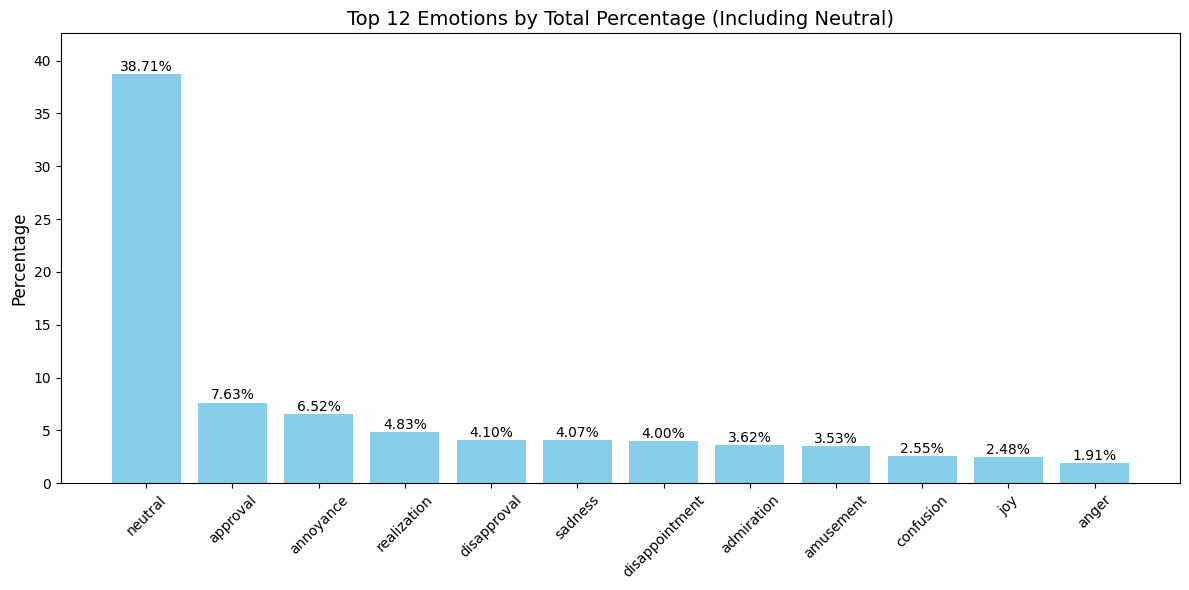

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV (replace with your filename)


# List of all 28 emotions including 'neutral'
emotion_columns = [
    'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion',
    'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment',
    'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism',
    'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral'
]

# Sum up all emotion probabilities column-wise
emotion_sums = df[emotion_columns].sum()

# Convert to percentages
emotion_percentages = (emotion_sums / emotion_sums.sum()) * 100

# Get top 12 emotions
top12 = emotion_percentages.sort_values(ascending=False).head(12)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(top12.index, top12.values, color='skyblue')
plt.title("Top 12 Emotions by Total Percentage (Including Neutral)", fontsize=14)
plt.ylabel("Percentage", fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, max(top12.values) * 1.1)

# Add values on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.3, f"{yval:.2f}%", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


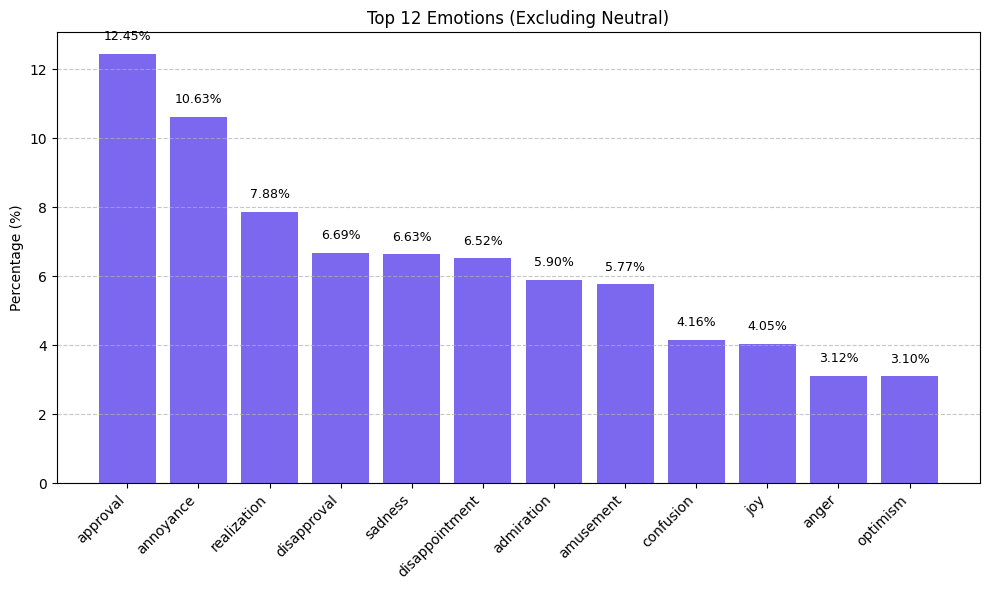

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named df
emotion_cols = [
    'admiration','amusement','anger','annoyance','approval','caring','confusion',
    'curiosity','desire','disappointment','disapproval','disgust','embarrassment',
    'excitement','fear','gratitude','grief','joy','love','nervousness','optimism',
    'pride','realization','relief','remorse','sadness','surprise','neutral'
]

# Exclude 'neutral'
emotion_cols_no_neutral = [col for col in emotion_cols if col != 'neutral']

# Sum and percentage
total_probs = df[emotion_cols_no_neutral].sum()
percentages = (total_probs / total_probs.sum()) * 100
top12 = percentages.sort_values(ascending=False).head(12)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(top12.index, top12.values, color='mediumslateblue')
plt.title("Top 12 Emotions (Excluding Neutral)")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.3,
        f'{height:.2f}%',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.tight_layout()
plt.show()


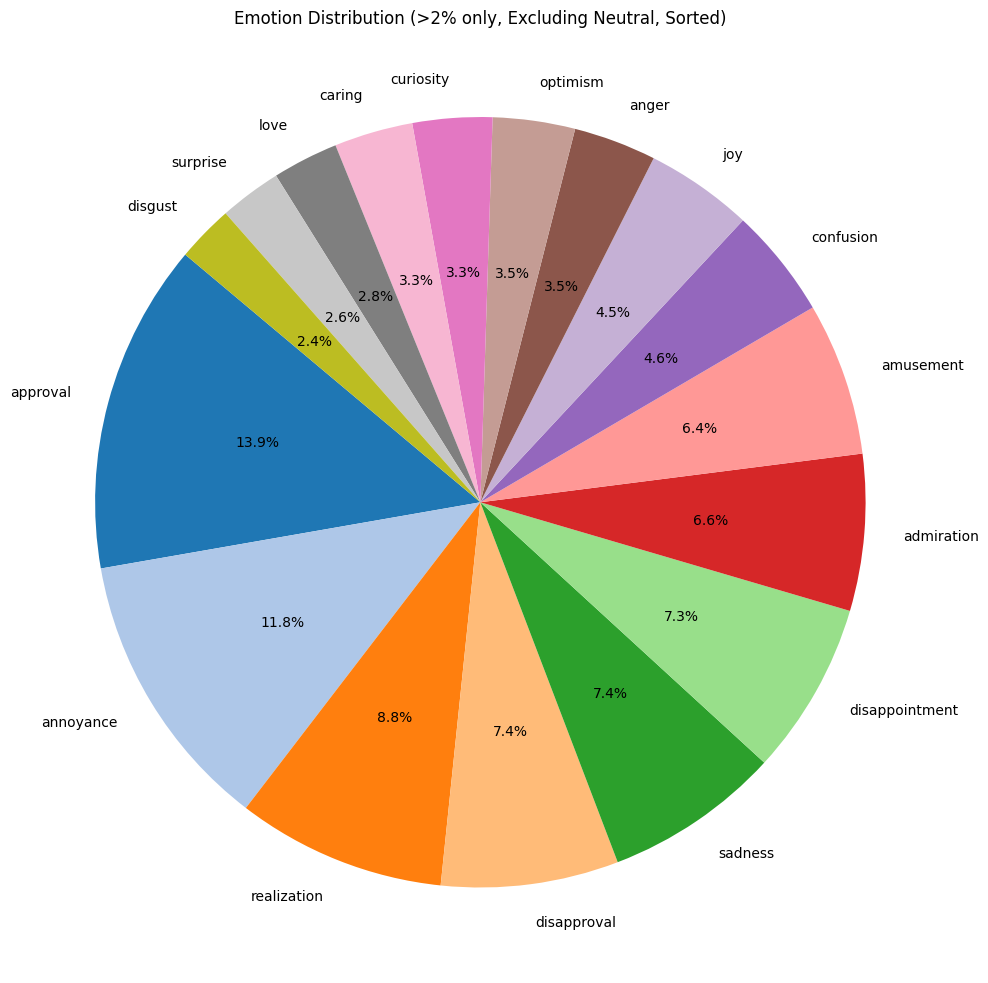

In [ ]:
import matplotlib.pyplot as plt

# Drop 'neutral' from emotion columns
emotion_cols_wo_neutral = [col for col in emotion_cols if col != 'neutral']

# Total sum for all emotions (excluding neutral)
emotion_totals_wo_neutral = df[emotion_cols_wo_neutral].sum()

# Convert to percentages
emotion_percentages_wo_neutral = (emotion_totals_wo_neutral / emotion_totals_wo_neutral.sum()) * 100

# Filter emotions >2%
filtered_emotions = emotion_percentages_wo_neutral[emotion_percentages_wo_neutral > 2]

# Sort in descending order
filtered_emotions = filtered_emotions.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 10))
plt.pie(
    filtered_emotions,
    labels=filtered_emotions.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab20.colors
)
plt.title("Emotion Distribution (>2% only, Excluding Neutral, Sorted)")
plt.axis('equal')
plt.tight_layout()
plt.show()


In [ ]:
# Define all emotion columns
emotion_cols = [
    'admiration','amusement','anger','annoyance','approval','caring','confusion',
    'curiosity','desire','disappointment','disapproval','disgust','embarrassment',
    'excitement','fear','gratitude','grief','joy','love','nervousness','optimism',
    'pride','realization','relief','remorse','sadness','surprise','neutral'
]

# Drop 'neutral' and compute total percentages
emotion_cols_no_neutral = [col for col in emotion_cols if col != 'neutral']
total_probs = df[emotion_cols_no_neutral].sum()
top12_emotions = total_probs.sort_values(ascending=False).head(12).index.tolist()


In [ ]:
import numpy as np

# Raw co-occurrence: Dot product of presence (prob > 0.01)
binary_df = (df[top12_emotions] > 0.01).astype(int)
raw_co_matrix = np.dot(binary_df.T, binary_df)
raw_co_df = pd.DataFrame(raw_co_matrix, index=top12_emotions, columns=top12_emotions)


In [ ]:
norm_co_df = raw_co_df.div(raw_co_df.sum(axis=1), axis=0)



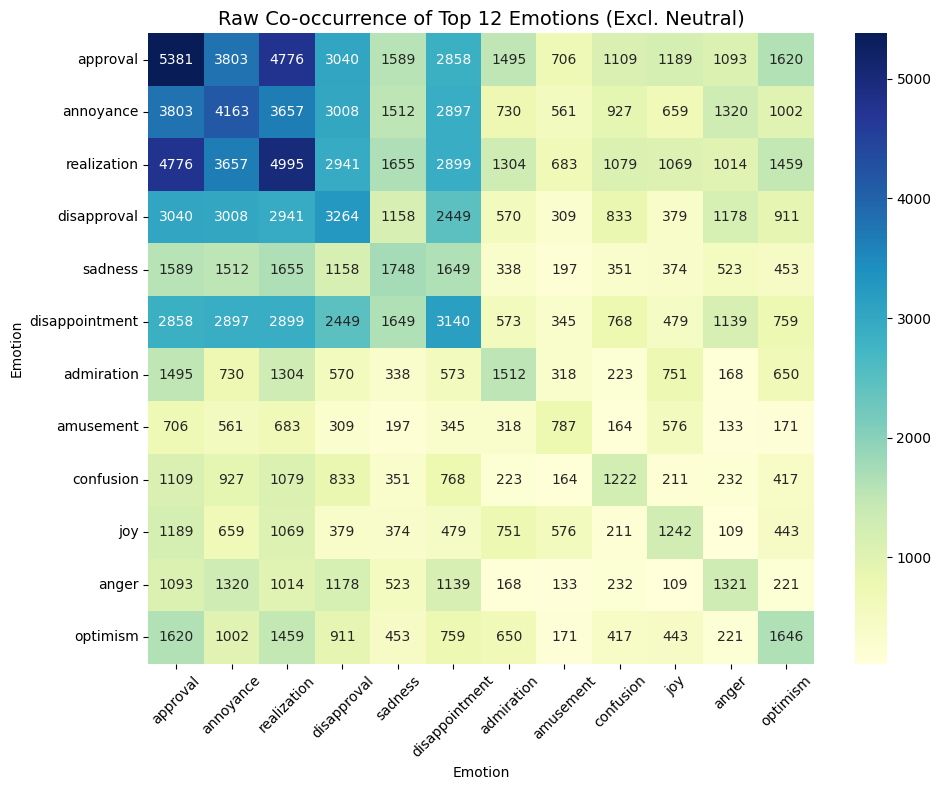

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(raw_co_df, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Raw Co-occurrence of Top 12 Emotions (Excl. Neutral)", fontsize=14)
plt.xlabel("Emotion")
plt.ylabel("Emotion")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


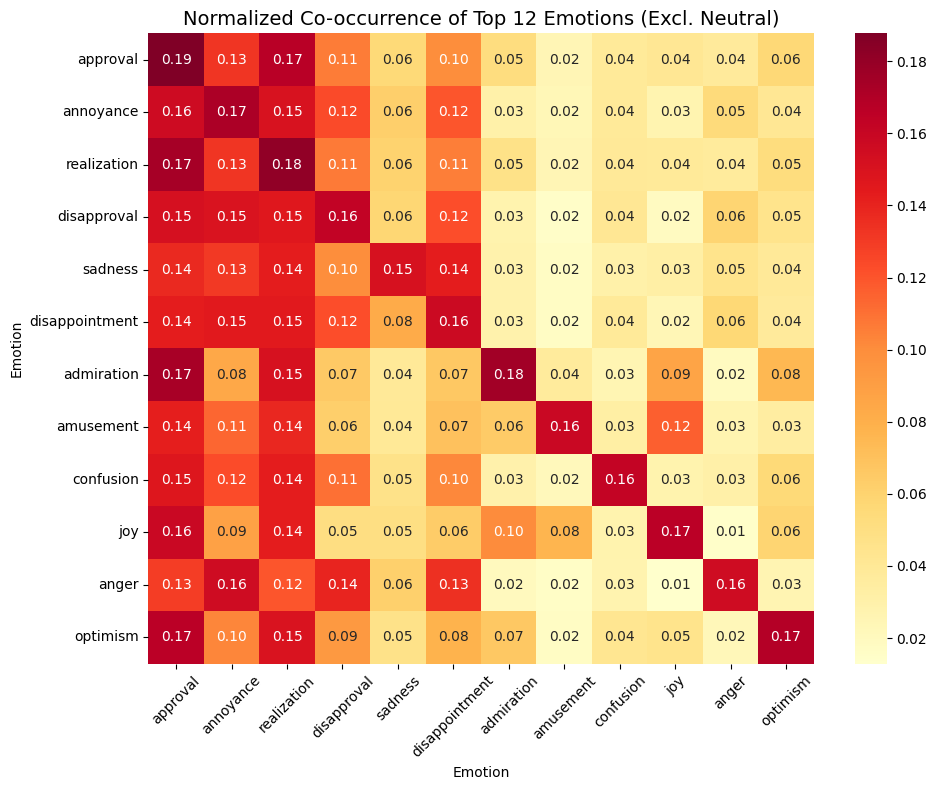

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(norm_co_df, annot=True, cmap="YlOrRd", fmt=".2f")
plt.title("Normalized Co-occurrence of Top 12 Emotions (Excl. Neutral)", fontsize=14)
plt.xlabel("Emotion")
plt.ylabel("Emotion")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# Binary matrix: 1 if emotion probability > 0.01, else 0
binary_df = (df[emotion_cols] > 0.01).astype(int)

# Co-occurrence raw counts
raw_co_matrix = np.dot(binary_df.T, binary_df)

# Create DataFrame for easier handling
raw_co_df = pd.DataFrame(raw_co_matrix, index=emotion_cols, columns=emotion_cols)

# Normalize: Each row shows how often that emotion co-occurs with the others (row-wise %)
norm_co_df = raw_co_df.div(raw_co_df.sum(axis=1), axis=0)


In [ ]:
from collections import Counter

# Define threshold for presence of an emotion
threshold = 0.01

# Binary presence (1 if present, else 0)
binary_df = (df[emotion_cols] > threshold).astype(int)

# Get emotion sets per row
emotion_sets = binary_df.apply(lambda row: tuple(sorted([emotion for emotion in emotion_cols if row[emotion] == 1])), axis=1)

# Count how many times each combination appears
combination_counts = Counter(emotion_sets)

# Remove empty combinations (where no emotion passed the threshold)
if () in combination_counts:
    del combination_counts[()]

# Get top 20 combinations
top_20_combinations = combination_counts.most_common(20)

# Display nicely
for idx, (combo, count) in enumerate(top_20_combinations, 1):
    print(f"{idx}. {list(combo)} --> {count} times")


1. ['annoyance', 'approval', 'disappointment', 'disapproval', 'neutral', 'realization'] --> 184 times
2. ['approval', 'neutral', 'realization'] --> 180 times
3. ['annoyance', 'approval', 'disapproval', 'neutral', 'realization'] --> 157 times
4. ['annoyance', 'approval', 'neutral', 'realization'] --> 134 times
5. ['annoyance', 'approval', 'disappointment', 'disapproval', 'neutral', 'realization', 'sadness'] --> 113 times
6. ['anger', 'annoyance', 'approval', 'disappointment', 'disapproval', 'disgust', 'neutral', 'realization'] --> 100 times
7. ['admiration', 'approval', 'neutral', 'realization'] --> 73 times
8. ['anger', 'annoyance', 'approval', 'disappointment', 'disapproval', 'neutral', 'realization'] --> 72 times
9. ['annoyance', 'approval', 'confusion', 'disappointment', 'disapproval', 'neutral', 'realization'] --> 62 times
10. ['annoyance', 'approval', 'disappointment', 'neutral', 'realization', 'sadness'] --> 44 times
11. ['annoyance', 'approval', 'neutral'] --> 41 times
12. ['app

/tmp/ipython-input-20-2084200741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=combos, palette='viridis')


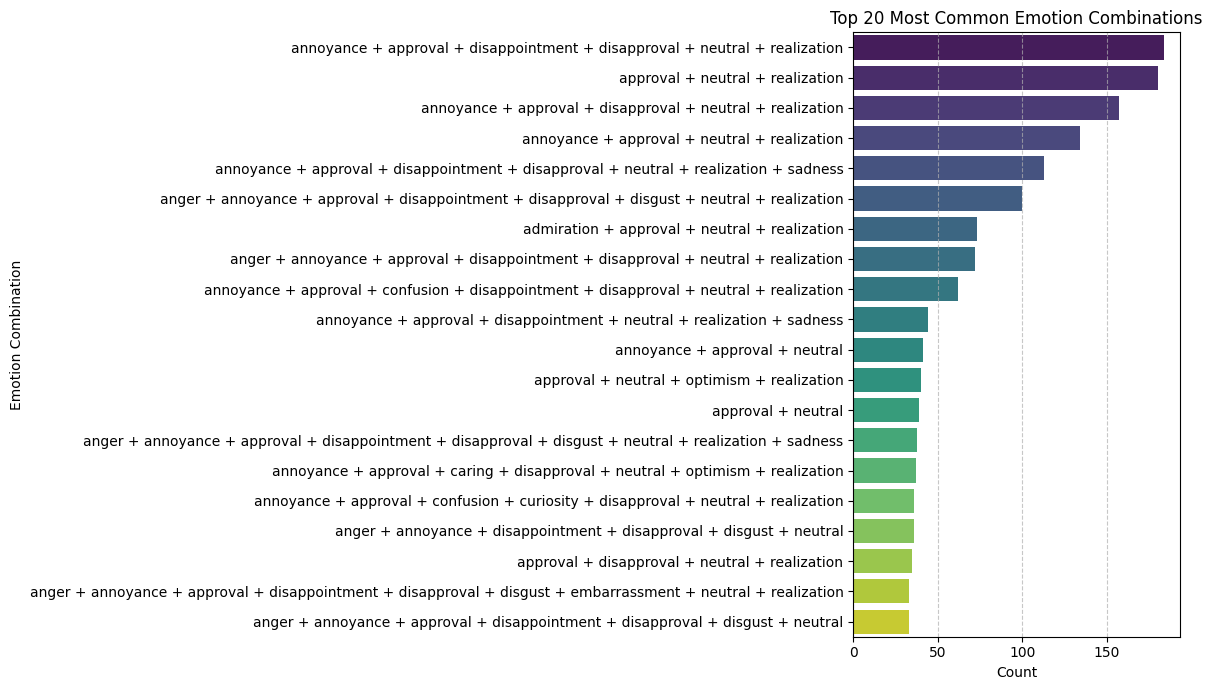

In [ ]:
# Prepare for plotting
combos = [' + '.join(combo) for combo, _ in top_20_combinations]
counts = [count for _, count in top_20_combinations]

plt.figure(figsize=(12, 7))
sns.barplot(x=counts, y=combos, palette='viridis')
plt.xlabel("Count")
plt.ylabel("Emotion Combination")
plt.title("Top 20 Most Common Emotion Combinations")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
from collections import Counter

# List of emotions excluding 'neutral'
emotion_cols_wo_neutral = [col for col in emotion_cols if col != 'neutral']

# Define presence threshold
threshold = 0.01

# Binary presence
binary_wo_neutral = (df[emotion_cols_wo_neutral] > threshold).astype(int)

# Get sorted emotion sets per row (excluding empty sets)
emotion_sets_wo_neutral = binary_wo_neutral.apply(
    lambda row: tuple(sorted([emo for emo in emotion_cols_wo_neutral if row[emo] == 1])), axis=1
)

# Count occurrences
combination_counts_wo_neutral = Counter(emotion_sets_wo_neutral)

# Remove empty ones if present
combination_counts_wo_neutral.pop((), None)

# Get top 20
top20_wo_neutral = combination_counts_wo_neutral.most_common(20)

# Display
print("🔝 Top 20 Emotion Combinations (Excluding Neutral):\n")
for idx, (combo, count) in enumerate(top20_wo_neutral, 1):
    print(f"{idx}. {list(combo)} --> {count} times")



🔝 Top 20 Emotion Combinations (Excluding Neutral):

1. ['annoyance', 'approval', 'disappointment', 'disapproval', 'realization'] --> 184 times
2. ['approval', 'realization'] --> 180 times
3. ['annoyance', 'approval', 'disapproval', 'realization'] --> 157 times
4. ['annoyance', 'approval', 'realization'] --> 134 times
5. ['annoyance', 'approval', 'disappointment', 'disapproval', 'realization', 'sadness'] --> 113 times
6. ['anger', 'annoyance', 'approval', 'disappointment', 'disapproval', 'disgust', 'realization'] --> 100 times
7. ['admiration', 'approval', 'realization'] --> 73 times
8. ['anger', 'annoyance', 'approval', 'disappointment', 'disapproval', 'realization'] --> 72 times
9. ['annoyance', 'approval', 'confusion', 'disappointment', 'disapproval', 'realization'] --> 62 times
10. ['annoyance', 'approval', 'disappointment', 'realization', 'sadness'] --> 44 times
11. ['annoyance', 'approval'] --> 41 times
12. ['approval', 'optimism', 'realization'] --> 40 times
13. ['approval'] --> 

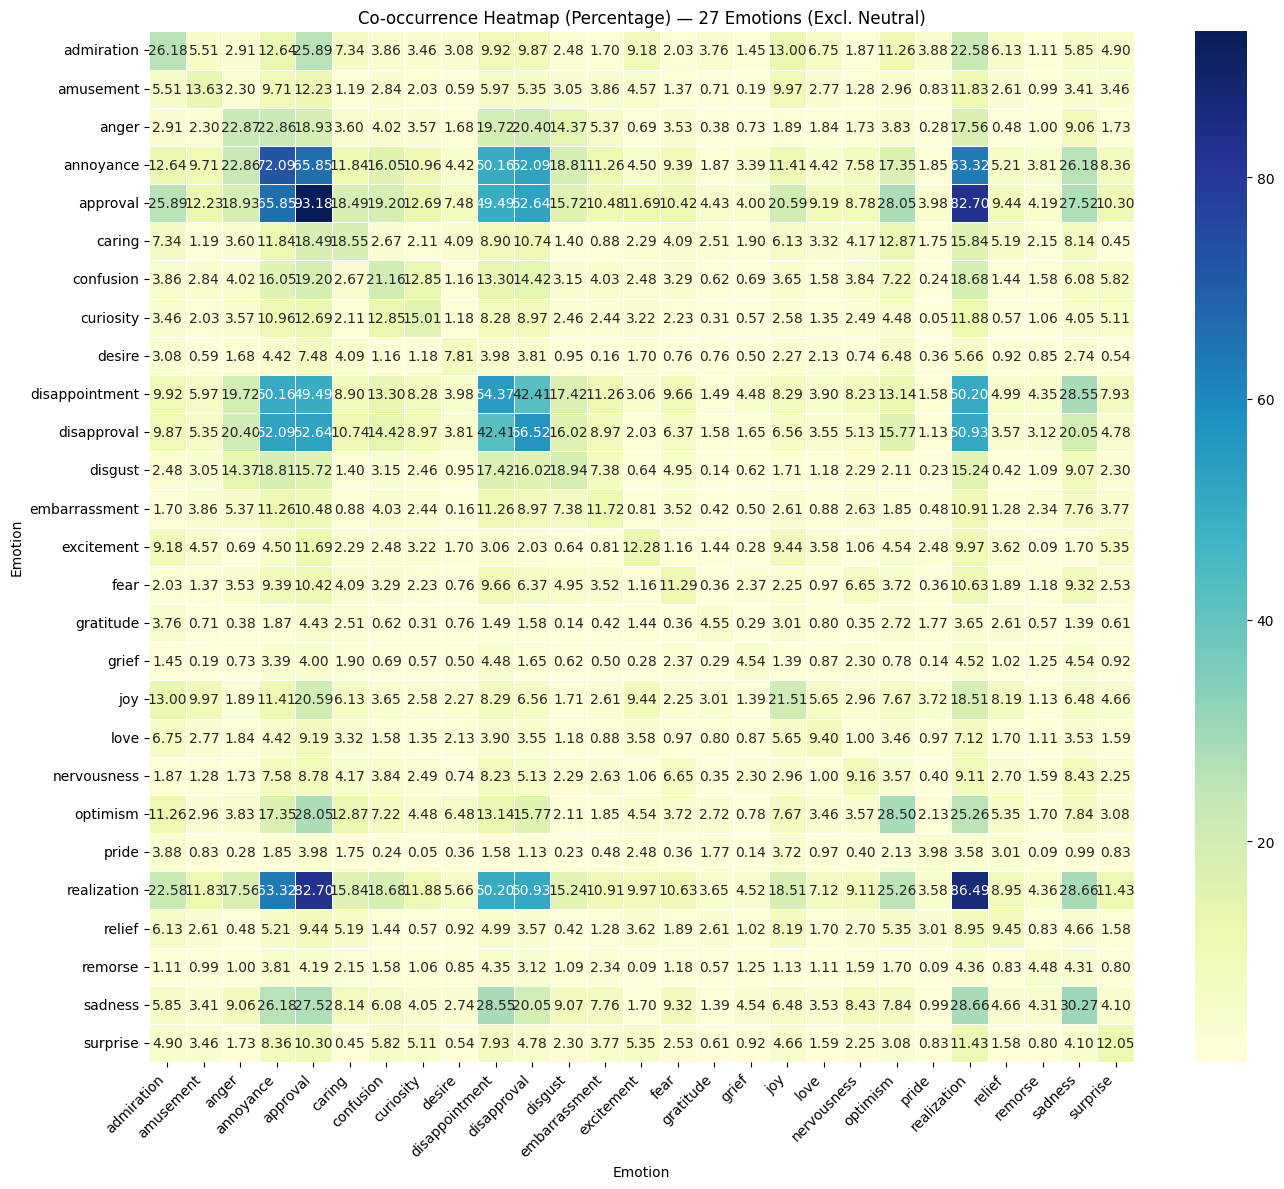

In [ ]:
# Binary matrix again for 27 emotions
binary_emotions = (df[emotion_cols_wo_neutral] > threshold).astype(int)

# Raw co-occurrence counts
cooccur_matrix_wo_neutral = binary_emotions.T.dot(binary_emotions)

# Normalize to percentage
total_comments = len(df)
cooccur_percent_wo_neutral = (cooccur_matrix_wo_neutral / total_comments) * 100

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(cooccur_percent_wo_neutral, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Co-occurrence Heatmap (Percentage) — 27 Emotions (Excl. Neutral)")
plt.xlabel("Emotion")
plt.ylabel("Emotion")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# Get raw co-occurrence counts (excluding diagonal, only upper triangle)
cooccur_raw = cooccur_matrix_wo_neutral.copy()
emotions = cooccur_raw.columns

# Store (emotion1, emotion2, count)
pairs = []

for i in range(len(emotions)):
    for j in range(i + 1, len(emotions)):
        e1 = emotions[i]
        e2 = emotions[j]
        count = cooccur_raw.loc[e1, e2]
        percent = (count / total_comments) * 100
        pairs.append(((e1, e2), count, percent))

# Sort by count
top20_pairs = sorted(pairs, key=lambda x: x[1], reverse=True)[:20]

# Print nicely
print("🔝 Top 20 Co-Occurring Emotion Pairs (Excl. Neutral):\n")
for idx, ((e1, e2), count, percent) in enumerate(top20_pairs, 1):
    print(f"{idx}. {e1} + {e2} --> {count} times ({percent:.2f}%)")


🔝 Top 20 Co-Occurring Emotion Pairs (Excl. Neutral):

1. approval + realization --> 4776 times (82.70%)
2. annoyance + approval --> 3803 times (65.85%)
3. annoyance + realization --> 3657 times (63.32%)
4. approval + disapproval --> 3040 times (52.64%)
5. annoyance + disapproval --> 3008 times (52.09%)
6. disapproval + realization --> 2941 times (50.93%)
7. disappointment + realization --> 2899 times (50.20%)
8. annoyance + disappointment --> 2897 times (50.16%)
9. approval + disappointment --> 2858 times (49.49%)
10. disappointment + disapproval --> 2449 times (42.41%)
11. realization + sadness --> 1655 times (28.66%)
12. disappointment + sadness --> 1649 times (28.55%)
13. approval + optimism --> 1620 times (28.05%)
14. approval + sadness --> 1589 times (27.52%)
15. annoyance + sadness --> 1512 times (26.18%)
16. admiration + approval --> 1495 times (25.89%)
17. optimism + realization --> 1459 times (25.26%)
18. anger + annoyance --> 1320 times (22.86%)
19. admiration + realization -

Saving genz_emotions_all28.csv to genz_emotions_all28 (1).csv
Data loaded successfully!


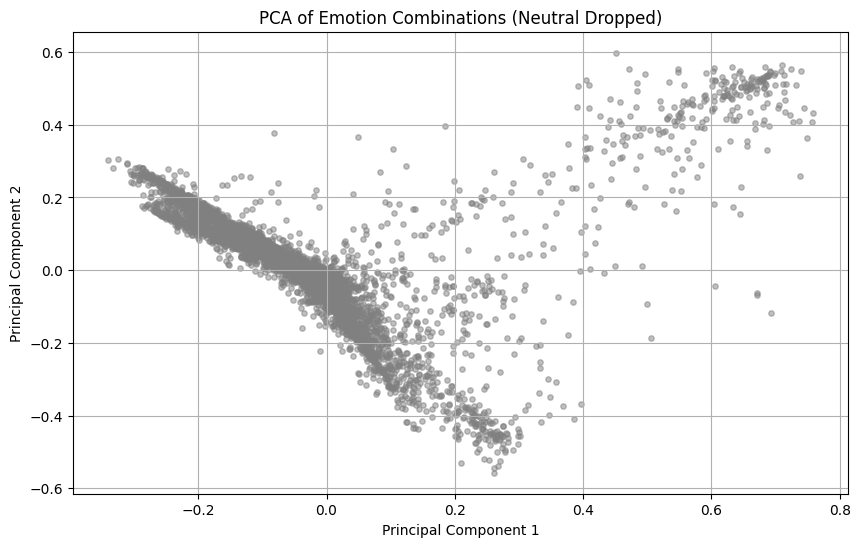

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from google.colab import files


uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))
print("Data loaded successfully!")


# Define all 28 emotions (including neutral)
emotion_cols = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
                'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval',
                'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy',
                'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief',
                'remorse', 'sadness', 'surprise', 'neutral']

# Drop 'neutral' column
emotion_cols_no_neutral = [col for col in emotion_cols if col != 'neutral']
X = df[emotion_cols_no_neutral]

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Create PCA DataFrame
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Plot raw spread (grey, unbiased)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], color='grey', alpha=0.5, s=15)
plt.title('PCA of Emotion Combinations (Neutral Dropped)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()



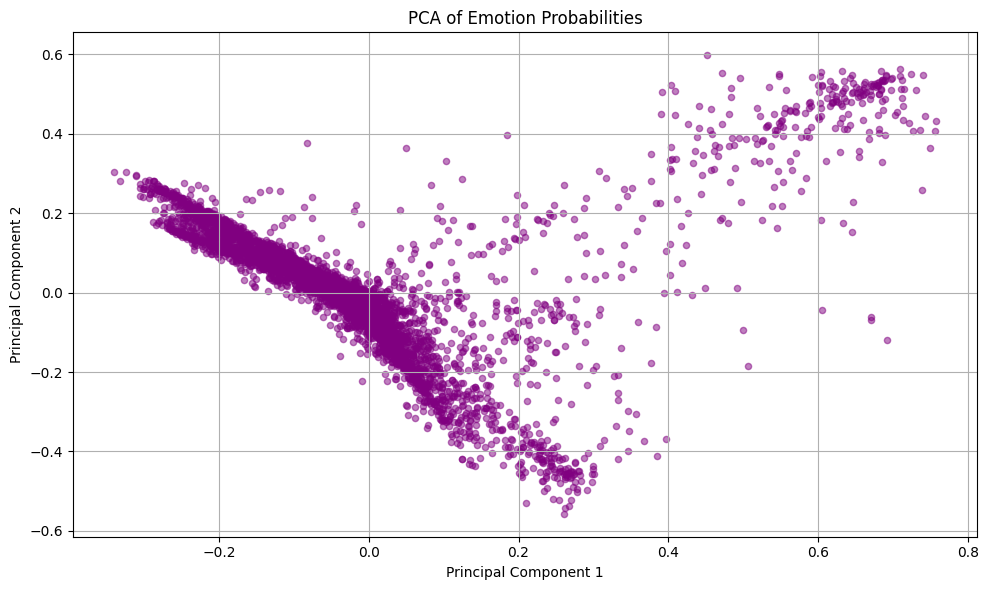

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Explicitly define emotion columns (safe from mistakes)
emotion_cols = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
                'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval',
                'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy',
                'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief',
                'remorse', 'sadness', 'surprise']

# Select emotion probability columns only
emotion_df = df[emotion_cols]

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(emotion_df)

# Add PCA results to df (optional)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Plot with consistent size and color
plt.figure(figsize=(10, 6))
plt.scatter(df['PCA1'], df['PCA2'], alpha=0.5, color='purple', s=20)
plt.title("PCA of Emotion Probabilities")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Use the same emotion columns again
emotion_cols = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
                'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval',
                'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy',
                'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief',
                'remorse', 'sadness', 'surprise']

# Select only emotion columns
emotion_df = df[emotion_cols]

# Run PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(emotion_df)

# Get loadings (influence of each emotion on each component)
loadings = pd.DataFrame(pca.components_.T,
                        columns=['PCA1', 'PCA2'],
                        index=emotion_cols)

# Display top contributing emotions
top_pca1 = loadings['PCA1'].abs().sort_values(ascending=False).head(5)
top_pca2 = loadings['PCA2'].abs().sort_values(ascending=False).head(5)

print("💡 Top contributing emotions to PCA1:")
print(top_pca1)

print("\n💡 Top contributing emotions to PCA2:")
print(top_pca2)


💡 Top contributing emotions to PCA1:
amusement     0.739349
annoyance     0.345125
admiration    0.282260
joy           0.262120
sadness       0.254113
Name: PCA1, dtype: float64

💡 Top contributing emotions to PCA2:
amusement     0.596515
approval      0.464446
admiration    0.449900
annoyance     0.351234
sadness       0.160648
Name: PCA2, dtype: float64


/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


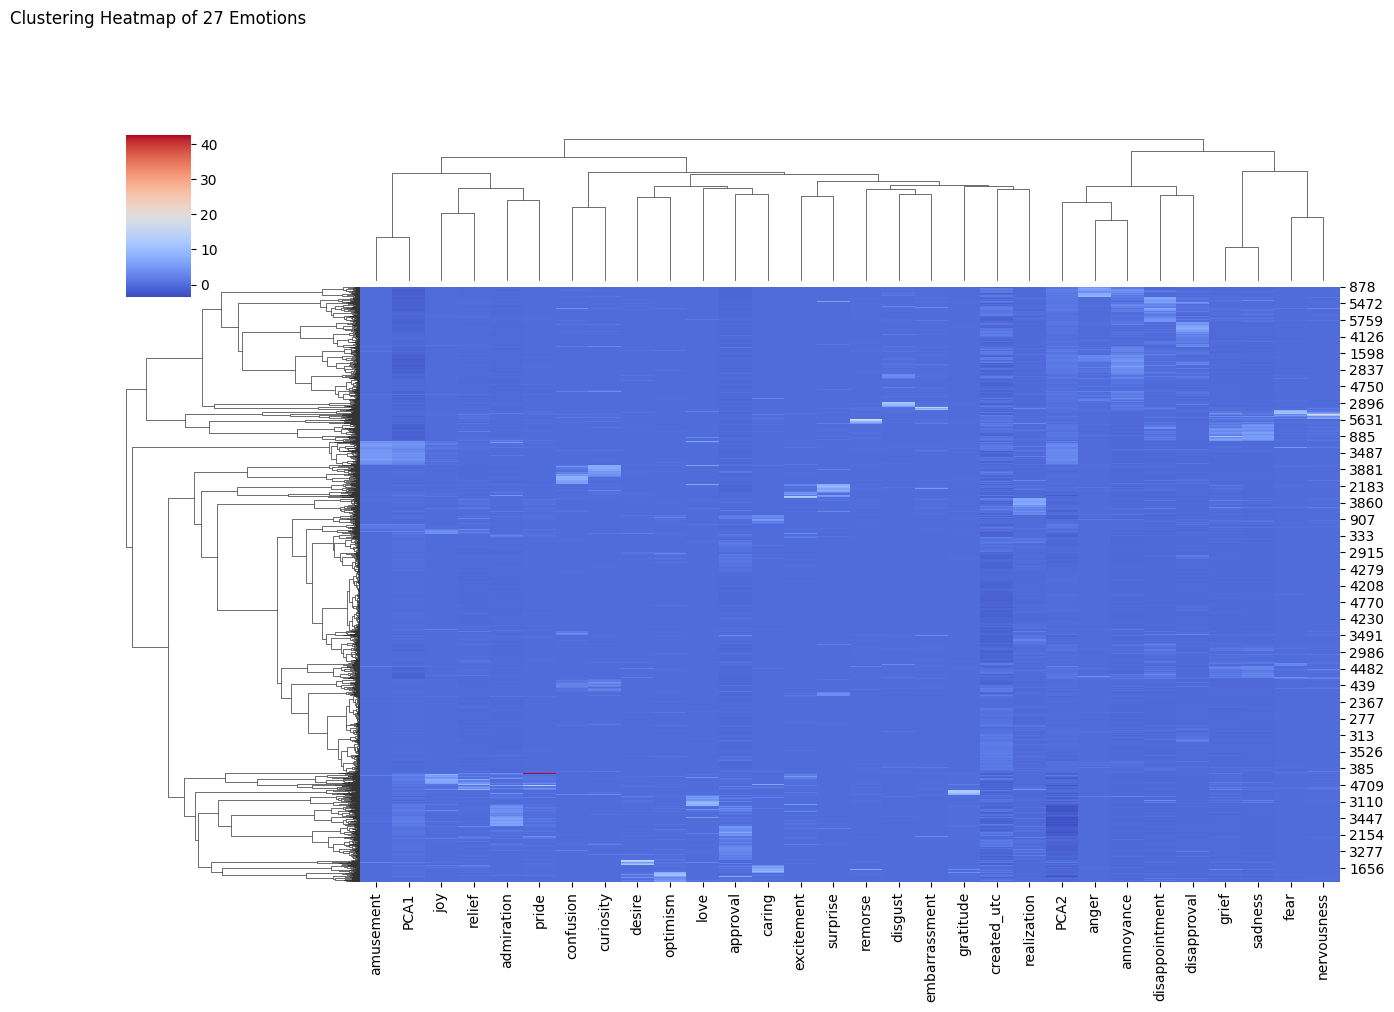

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 2: Standardize emotion values for clustering
scaler = StandardScaler()
scaled_emotions = scaler.fit_transform(emotion_df)
scaled_df = pd.DataFrame(scaled_emotions, columns=emotion_cols, index=df.index)

# Step 3: Create heatmap
sns.clustermap(
    scaled_df,
    method='ward',
    metric='euclidean',
    cmap='coolwarm',
    figsize=(13, 9),
    col_cluster=True,
    row_cluster=True
)

plt.title("Clustering Heatmap of 27 Emotions", pad=80)
plt.show()


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Just making sure we're focusing on 27 emotions
from google.colab import files



df = pd.read_csv("genz_emotions_all28.csv")
print("Data loaded successfully!")



emotion_cols = [col for col in df.columns if col not in ['neutral', 'text', 'id', 'author']]  # Adjust if needed
emotion_df = df[emotion_cols]


Data loaded successfully!


In [ ]:
# ✅ Define your correct 27 emotion columns (excluding text-related and 'neutral')
emotion_cols = [
    'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
    'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust',
    'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy',
    'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief',
    'remorse', 'sadness', 'surprise'
]

# ✅ Subset the dataframe
emotion_df = df[emotion_cols]

# ✅ Check all are floats
print(emotion_df.dtypes)


admiration        float64
amusement         float64
anger             float64
annoyance         float64
approval          float64
caring            float64
confusion         float64
curiosity         float64
desire            float64
disappointment    float64
disapproval       float64
disgust           float64
embarrassment     float64
excitement        float64
fear              float64
gratitude         float64
grief             float64
joy               float64
love              float64
nervousness       float64
optimism          float64
pride             float64
realization       float64
relief            float64
remorse           float64
sadness           float64
surprise          float64
dtype: object


<Figure size 1600x1400 with 0 Axes>

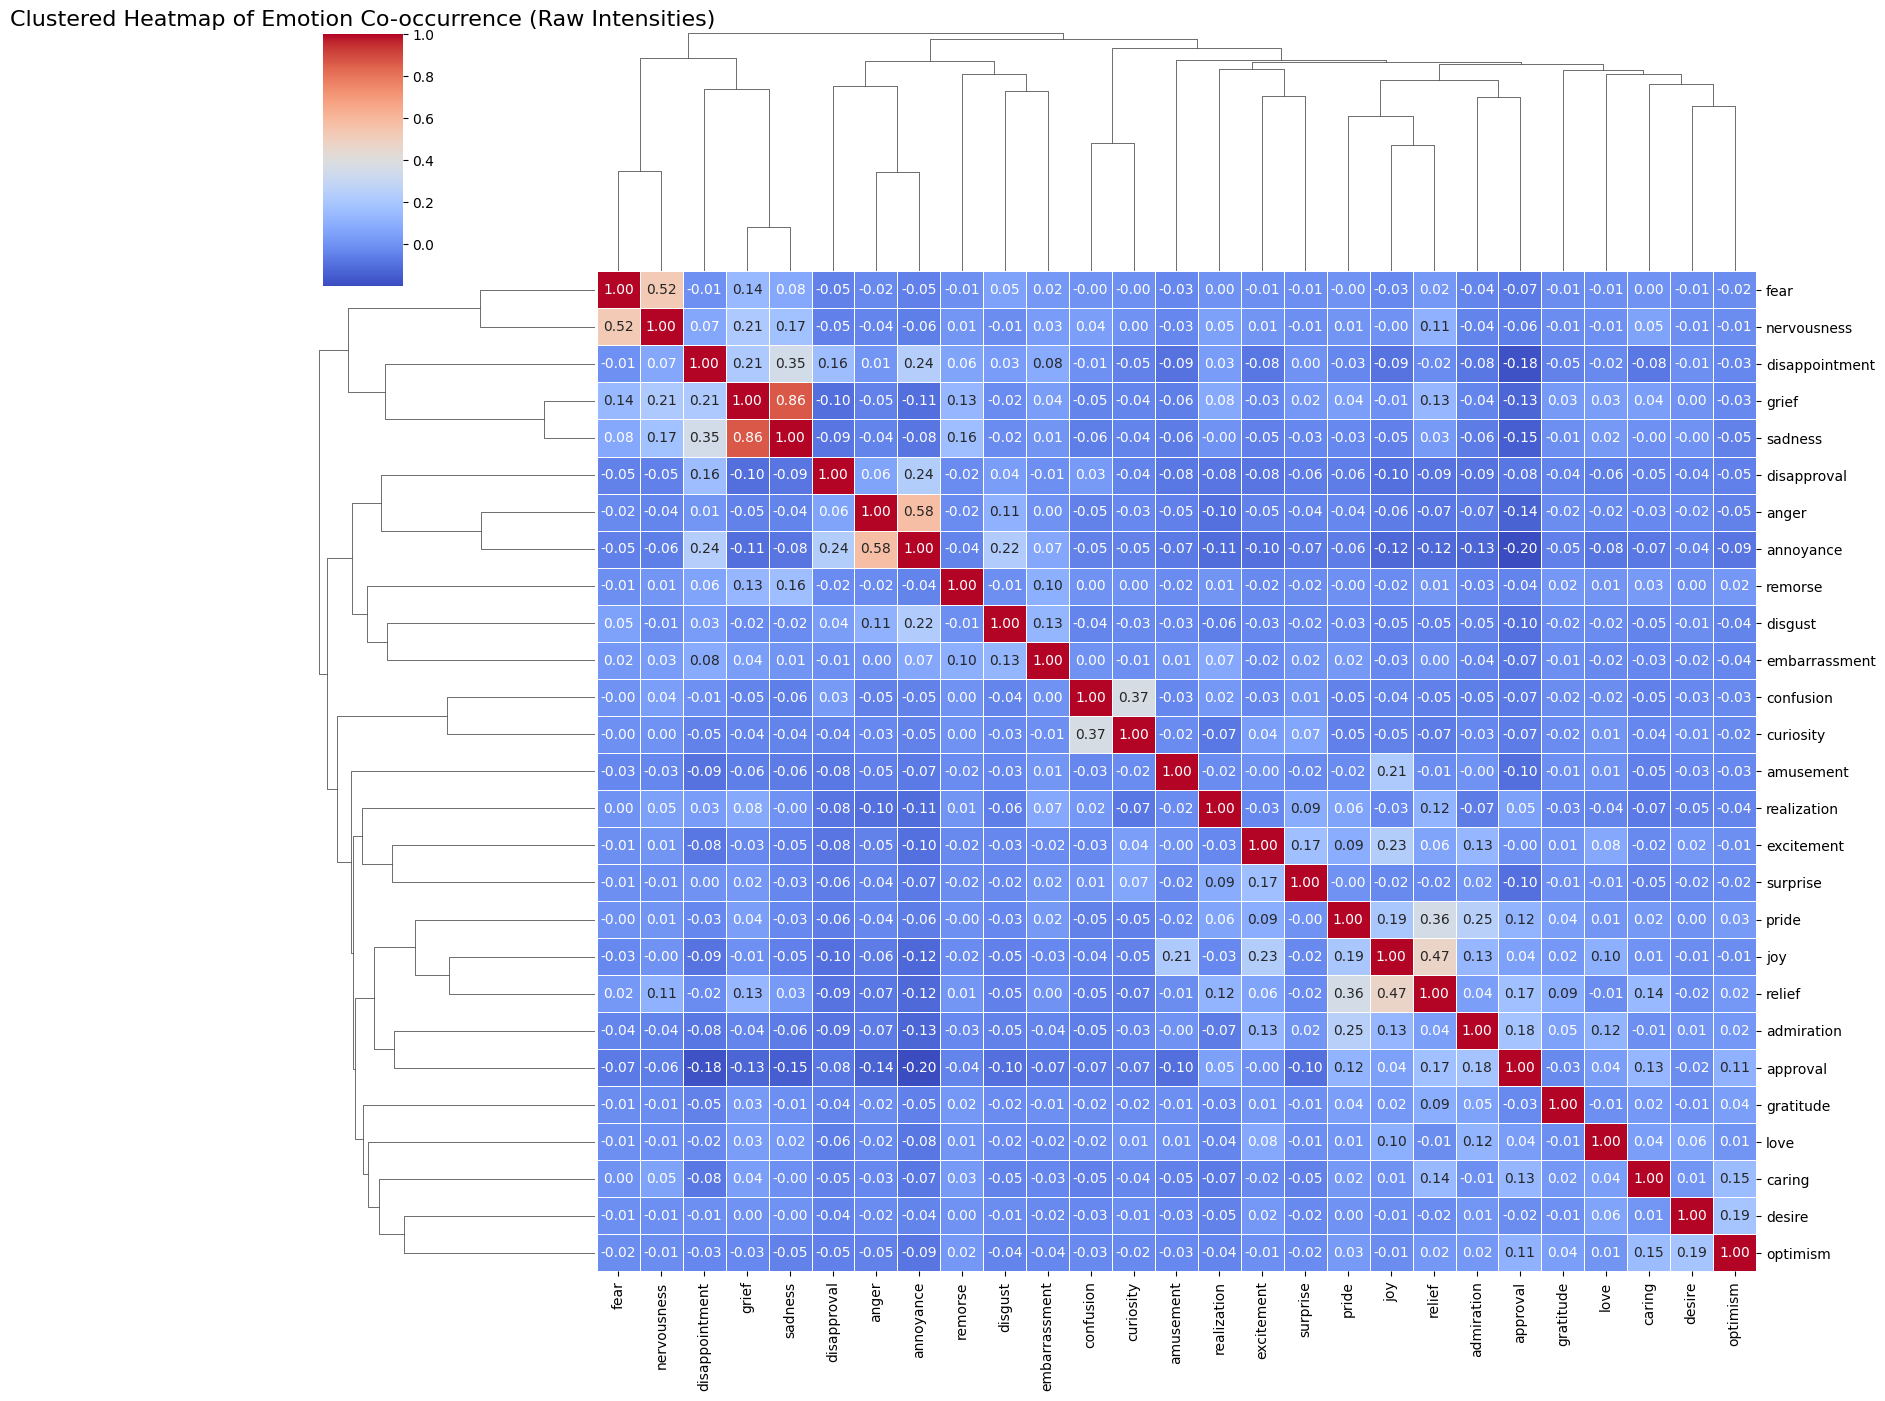

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load your dataframe
df = pd.read_csv("genz_emotions_all28.csv")

# Step 1: Extract only the 27 emotion columns (excluding 'neutral')
emotion_cols = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
                'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval',
                'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief',
                'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization',
                'relief', 'remorse', 'sadness', 'surprise']

emotion_df = df[emotion_cols]

# Step 2: Compute correlation matrix for raw intensity values
correlation_matrix = emotion_df.corr()

# Step 3: Plot as clustered heatmap (larger, readable, raw co-occurrence)
plt.figure(figsize=(16, 14))
sns.clustermap(correlation_matrix, cmap="coolwarm", linewidths=0.5, figsize=(16, 14),
               annot=True, fmt=".2f")

plt.title("Clustered Heatmap of Emotion Co-occurrence (Raw Intensities)", fontsize=16)
plt.show()



In [ ]:
pip install wordcloud


In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import defaultdict


In [ ]:
# Upload CSV manually
from google.colab import files
uploaded = files.upload()


Saving genz_emotions_all28.csv to genz_emotions_all28.csv


In [ ]:
import pandas as pd

# Replace the file path with the actual path if needed
df = pd.read_csv('/content/genz_emotions_all28.csv')


In [ ]:
from collections import defaultdict
import os

# Create a folder to save wordclouds
os.makedirs('/content/wordclouds', exist_ok=True)

# Reset emotion_words
emotion_words = defaultdict(str)

# Emotion columns (excluding neutral and meta)
excluded_cols = ['neutral', 'comment_body', 'time', 'topic']
emotion_cols = [col for col in df.columns if col not in excluded_cols]

# Multiplier to scale emotion intensity into word repetition
weight_multiplier = 20

# For each emotion, collect top comments and repeat words by intensity
for emotion in emotion_cols:
    # Take top 30 comments with highest emotion intensity
    top_df = df.sort_values(by=emotion, ascending=False).head(30)

    for _, row in top_df.iterrows():
        comment = str(row['comment_body'])
        score = row[emotion]

        # Convert score to float safely
        try:
            score_float = float(score)
        except ValueError:
            continue  # skip if conversion fails

        # Basic cleaning
        words = comment.lower().split()

        for word in words:
            if len(word) > 2:
                repeat_count = min(50, max(1, int(score_float * weight_multiplier)))
                emotion_words[emotion] += (word + ' ') * repeat_count


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for emotion, text in emotion_words.items():
    if text.strip():  # make sure it's not empty
        wc = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title(emotion.upper())
        plt.tight_layout(pad=0)
        plt.savefig(f'/content/wordclouds/{emotion}.png')  # saves the image
        plt.close()


In [ ]:
print(emotion_words['joy'][:300])  # Shows first 300 characters of words related to 'joy'


me, me, me, me, me, me, me, me, me, me, me, me, me, me, me, me, me, me, actually. actually. actually. actually. actually. actually. actually. actually. actually. actually. actually. actually. actually. actually. actually. actually. actually. actually. was was was was was was was was was was was was 


In [ ]:
# Step 1: Zip the folder
!zip -r wordclouds.zip /content/wordclouds

# Step 2: Provide a download link
from google.colab import files
files.download('wordclouds.zip')


  adding: content/wordclouds/ (stored 0%)
  adding: content/wordclouds/confusion.png (deflated 0%)
  adding: content/wordclouds/disapproval.png (deflated 0%)
  adding: content/wordclouds/love.png (deflated 0%)
  adding: content/wordclouds/curiosity.png (deflated 0%)
  adding: content/wordclouds/remorse.png (deflated 0%)
  adding: content/wordclouds/caring.png (deflated 0%)
  adding: content/wordclouds/gratitude.png (deflated 0%)
  adding: content/wordclouds/admiration.png (deflated 0%)
  adding: content/wordclouds/created_utc.png (deflated 0%)
  adding: content/wordclouds/embarrassment.png (deflated 0%)
  adding: content/wordclouds/pride.png (deflated 0%)
  adding: content/wordclouds/joy.png (deflated 0%)
  adding: content/wordclouds/desire.png (deflated 0%)
  adding: content/wordclouds/approval.png (deflated 0%)
  adding: content/wordclouds/anger.png (deflated 0%)
  adding: content/wordclouds/sadness.png (deflated 0%)
  adding: content/wordclouds/optimism.png (deflated 0%)
  adding: c

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from collections import Counter
import random

# Symbolic templates for poetic dream sentences
templates = [
    "In the land of {emotion}, the air smelled of {word1} and {word2}, where even {word3} whispered secrets.",
    "A {word1} lingered in the sky of {emotion}, while {word2} and {word3} painted the silence.",
    "Beneath the shadow of {emotion}, {word1} bloomed beside {word2}, and {word3} danced in the wind.",
    "The realm of {emotion} was carved by {word1}, lit by {word2}, and haunted by {word3}.",
]

# Function to generate dream lines per emotion
def generate_dream_lines(emotion_words, top_n=3):
    dream_lines = {}

    for emotion, text_blob in emotion_words.items():
        # Get most common words for each emotion
        words = text_blob.strip().split()
        most_common = [w for w, _ in Counter(words).most_common(10) if len(w) > 2]
        if len(most_common) < 3:
            continue

        # Randomly sample 3 symbolic words
        selected_words = random.sample(most_common, 3)

        # Pick a random poetic template and fill it
        template = random.choice(templates)
        sentence = template.format(
            emotion=emotion,
            word1=selected_words[0],
            word2=selected_words[1],
            word3=selected_words[2]
        )
        dream_lines[emotion] = sentence

    return dream_lines

# Generate symbolic dream layer
symbolic_dreams = generate_dream_lines(emotion_words)


/tmp/ipython-input-3567297677.py:28: UserWarning: Glyph 127749 (\N{SUNRISE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1400x800 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127749 (\N{SUNRISE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


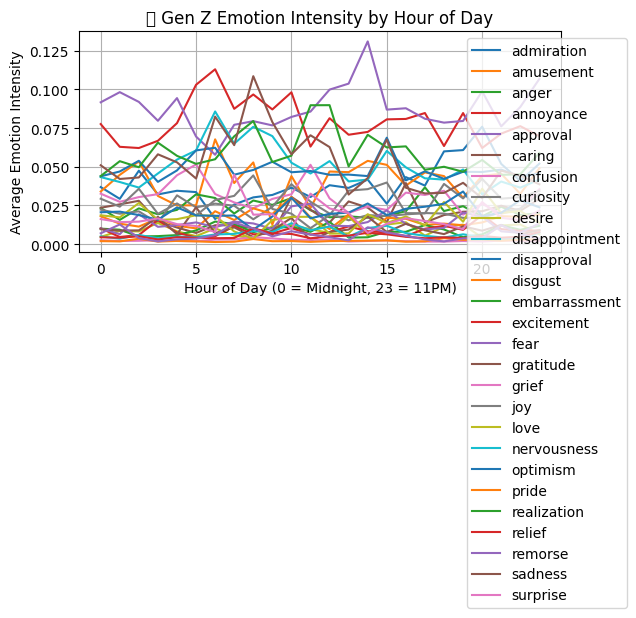

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/content/genz_all_emotions28.csv')

# Ensure 'created_time' is in datetime format
df['created_time'] = pd.to_datetime(df['created_time'], errors='coerce')

# Extract hour from created_time
df['hour'] = df['created_time'].dt.hour

# Filter numeric columns (excluding 'neutral')
emotion_columns = df.select_dtypes(include='number').columns.tolist()
emotion_columns = [col for col in emotion_columns if col not in ['neutral', 'created_utc', 'hour']]

# Now group and average only numeric emotion columns by hour
hourly_emotions = df.groupby('hour')[emotion_columns].mean()

# Plotting
plt.figure(figsize=(14, 8))
hourly_emotions.plot()
plt.title("🌅 Gen Z Emotion Intensity by Hour of Day")
plt.xlabel("Hour of Day (0 = Midnight, 23 = 11PM)")
plt.ylabel("Average Emotion Intensity")
plt.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()


<Figure size 1400x700 with 0 Axes>

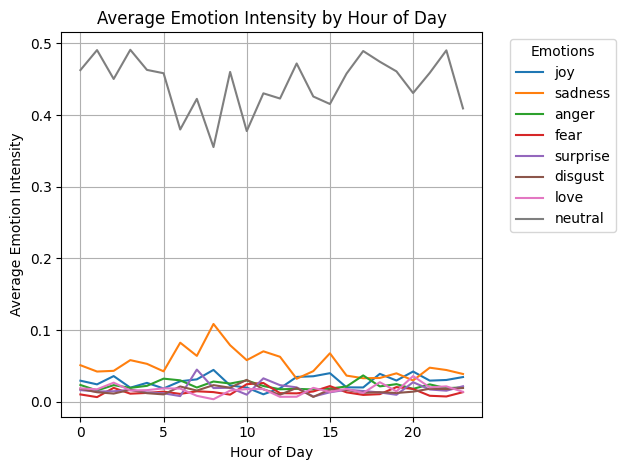

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/genz_emotions_all28.csv')

# Parse 'created_time' correctly
df['created_time'] = pd.to_datetime(df['created_time'], errors='coerce')

# Extract hour from the timestamp
df['hour'] = df['created_time'].dt.hour

# Select emotion columns (you can edit this list as per your file)
emotion_columns = ['joy', 'sadness', 'anger', 'fear', 'surprise', 'disgust', 'love', 'neutral']  # example set

# Group by hour and calculate average emotion scores
hourly_emotions = df.groupby('hour')[emotion_columns].mean()

# Plotting
plt.figure(figsize=(14, 7))
ax = hourly_emotions.plot()
plt.title("Average Emotion Intensity by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Emotion Intensity")
plt.grid(True)

# Move legend outside the plot
plt.legend(title="Emotions", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/tmp/ipython-input-4123005945.py:29: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


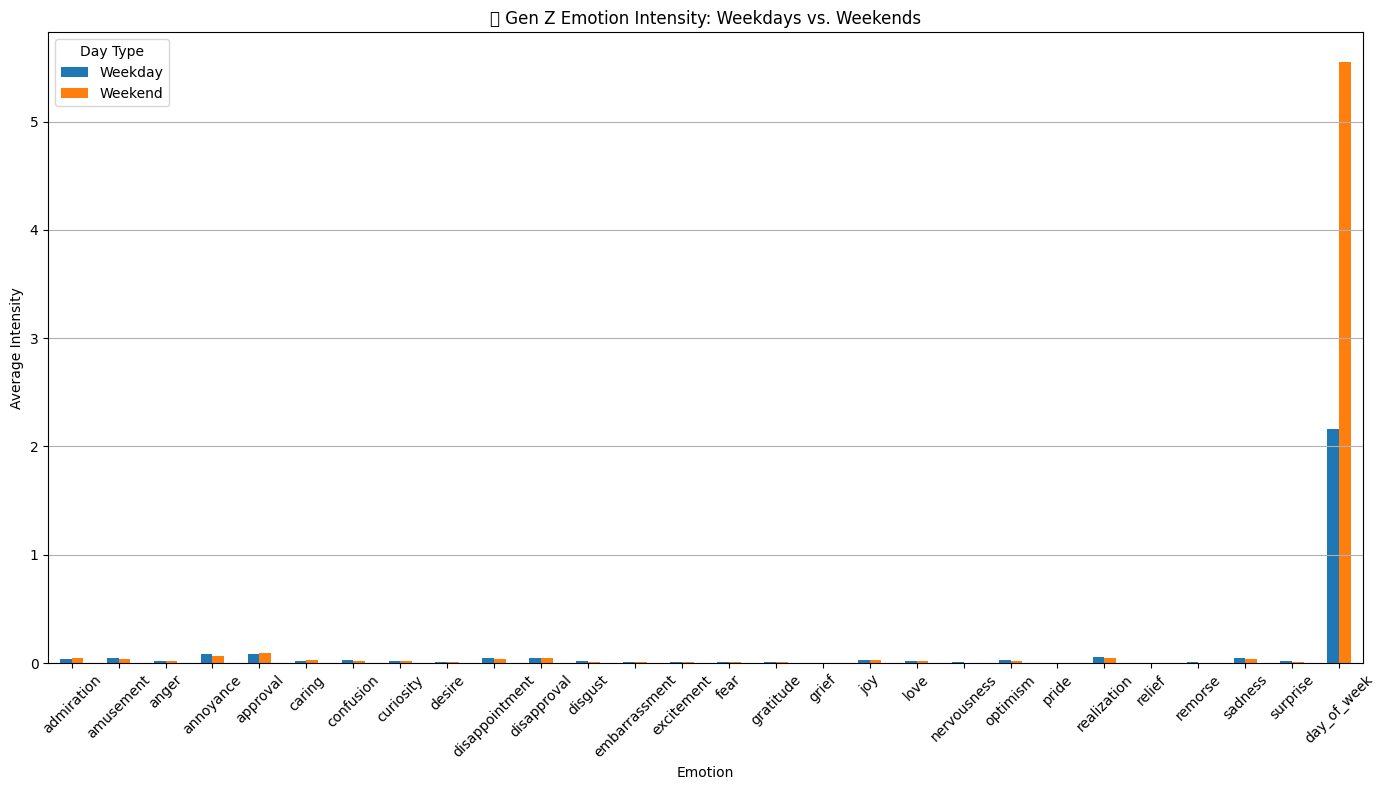

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and parse datetime again if not already
df = pd.read_csv('/content/genz_emotions_all28.csv')
df['created_time'] = pd.to_datetime(df['created_time'], errors='coerce')

# Extract day of week: Monday=0, Sunday=6
df['day_of_week'] = df['created_time'].dt.dayofweek

# Classify days as weekday or weekend
df['day_type'] = df['day_of_week'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

# Select numeric emotion columns only (excluding neutral, created_utc, hour)
emotion_columns = df.select_dtypes(include='number').columns.tolist()
emotion_columns = [col for col in emotion_columns if col not in ['neutral', 'created_utc', 'hour']]

# Group and average by day_type
emotion_by_day_type = df.groupby('day_type')[emotion_columns].mean().T  # transpose for easier plotting

# Plot comparison
emotion_by_day_type.plot(kind='bar', figsize=(14, 8))
plt.title("📆 Gen Z Emotion Intensity: Weekdays vs. Weekends")
plt.xlabel("Emotion")
plt.ylabel("Average Intensity")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Day Type')
plt.tight_layout()
plt.show()



/tmp/ipython-input-1779051687.py:44: UserWarning: Glyph 127780 (\N{WHITE SUN WITH SMALL CLOUD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1779051687.py:44: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127780 (\N{WHITE SUN WITH SMALL CLOUD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


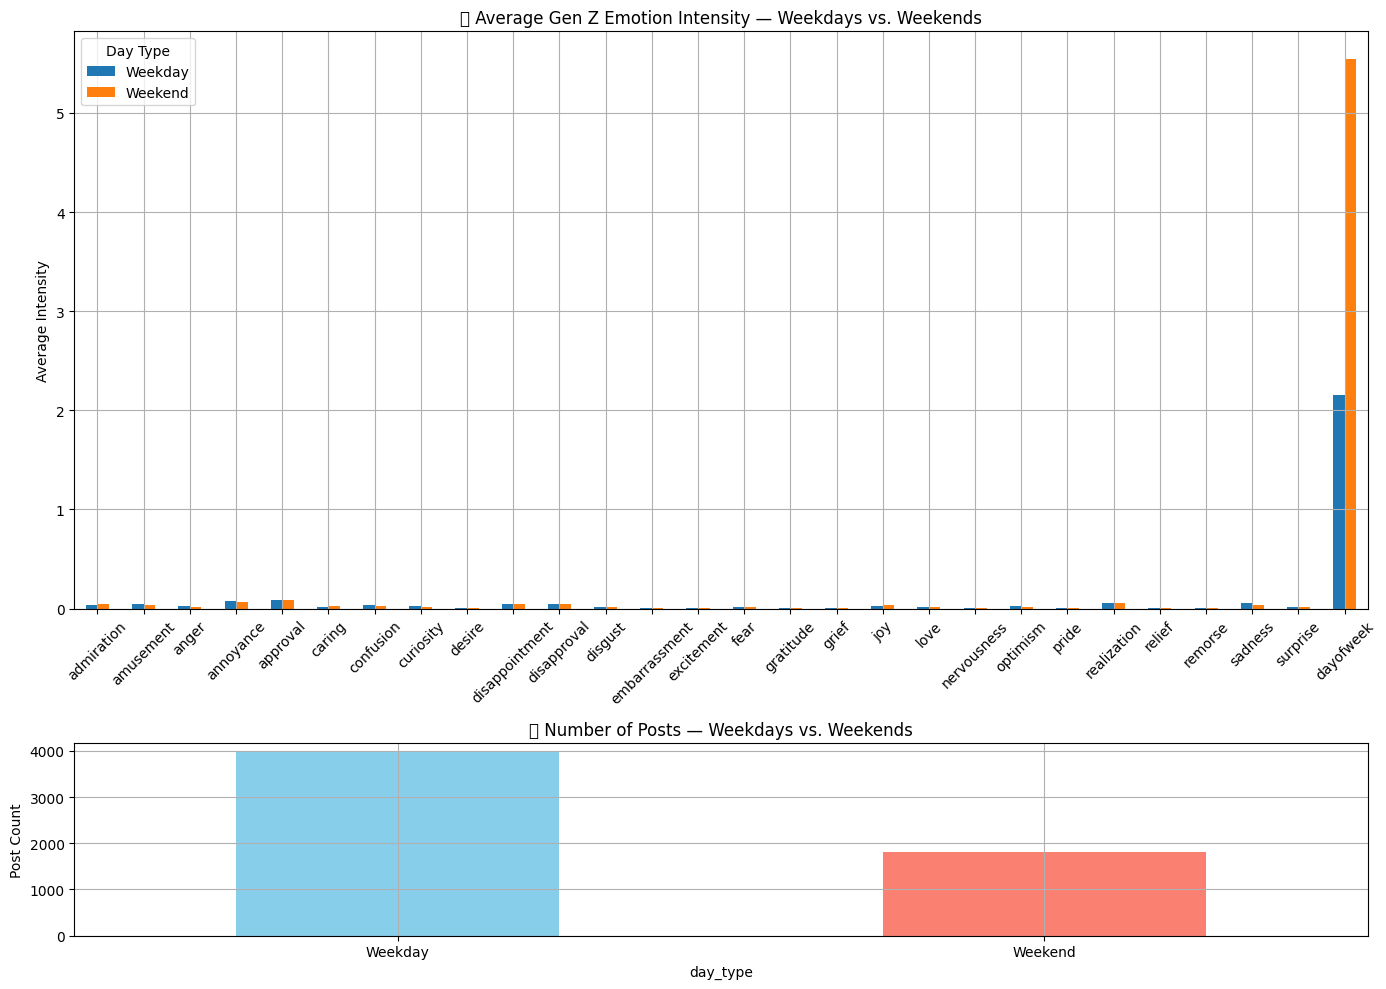

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/content/genz_emotions_all28.csv')

# Convert 'created_time' to datetime
df['created_time'] = pd.to_datetime(df['created_time'], errors='coerce')

# Extract day of week (0 = Monday, 6 = Sunday)
df['dayofweek'] = df['created_time'].dt.dayofweek

# Label each row as 'Weekday' or 'Weekend'
df['day_type'] = df['dayofweek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Emotion columns (excluding metadata)
emotion_cols = df.select_dtypes(include='number').columns.tolist()
emotion_cols = [col for col in emotion_cols if col not in ['neutral', 'created_utc', 'hour']]

# Group by day type and calculate average emotion intensity
avg_emotions = df.groupby('day_type')[emotion_cols].mean()

# Count number of posts in each group
post_counts = df['day_type'].value_counts()

# Plot
fig, axs = plt.subplots(2, 1, figsize=(14, 10), gridspec_kw={'height_ratios': [3, 1]})

# Top: Emotion intensity
avg_emotions.T.plot(kind='bar', ax=axs[0])
axs[0].set_title("🌤️ Average Gen Z Emotion Intensity — Weekdays vs. Weekends")
axs[0].set_ylabel("Average Intensity")
axs[0].grid(True)
axs[0].legend(title='Day Type')
axs[0].tick_params(axis='x', rotation=45)

# Bottom: Post counts
post_counts.plot(kind='bar', color=['skyblue', 'salmon'], ax=axs[1])
axs[1].set_title("📊 Number of Posts — Weekdays vs. Weekends")
axs[1].set_ylabel("Post Count")
axs[1].grid(True)
axs[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()
